## **Loading Dataset**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

df= sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## **1. Scatter Matrix for IRIS dataset**

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

<Figure size 1000x1000 with 0 Axes>

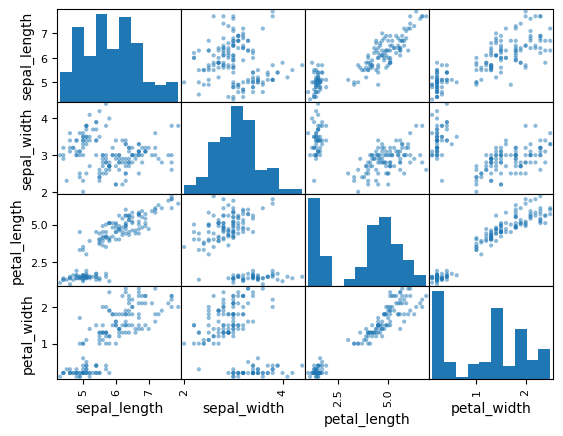

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
pd.plotting.scatter_matrix(df)


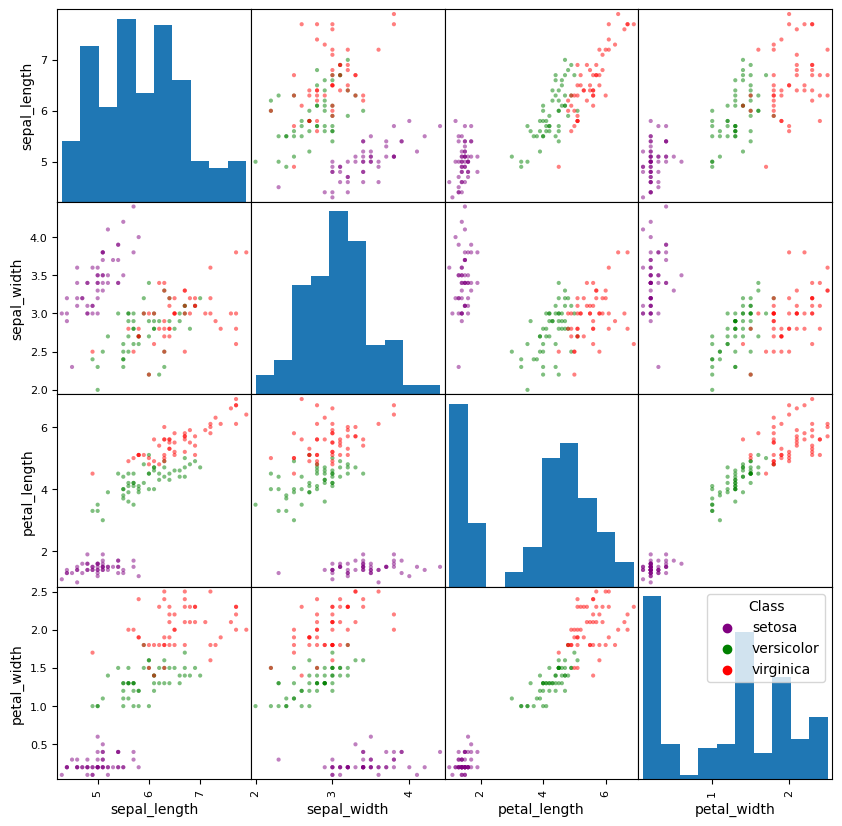

In [3]:
colors = {'setosa': 'purple', 'versicolor': 'green', 'virginica': 'red'}
pd.plotting.scatter_matrix(df, figsize=(10, 10), c=df['species'].apply(lambda x: colors[x]))
handles = [plt.scatter([], [], c=colors[label], label=label) for label in colors]
plt.legend(title='Class')

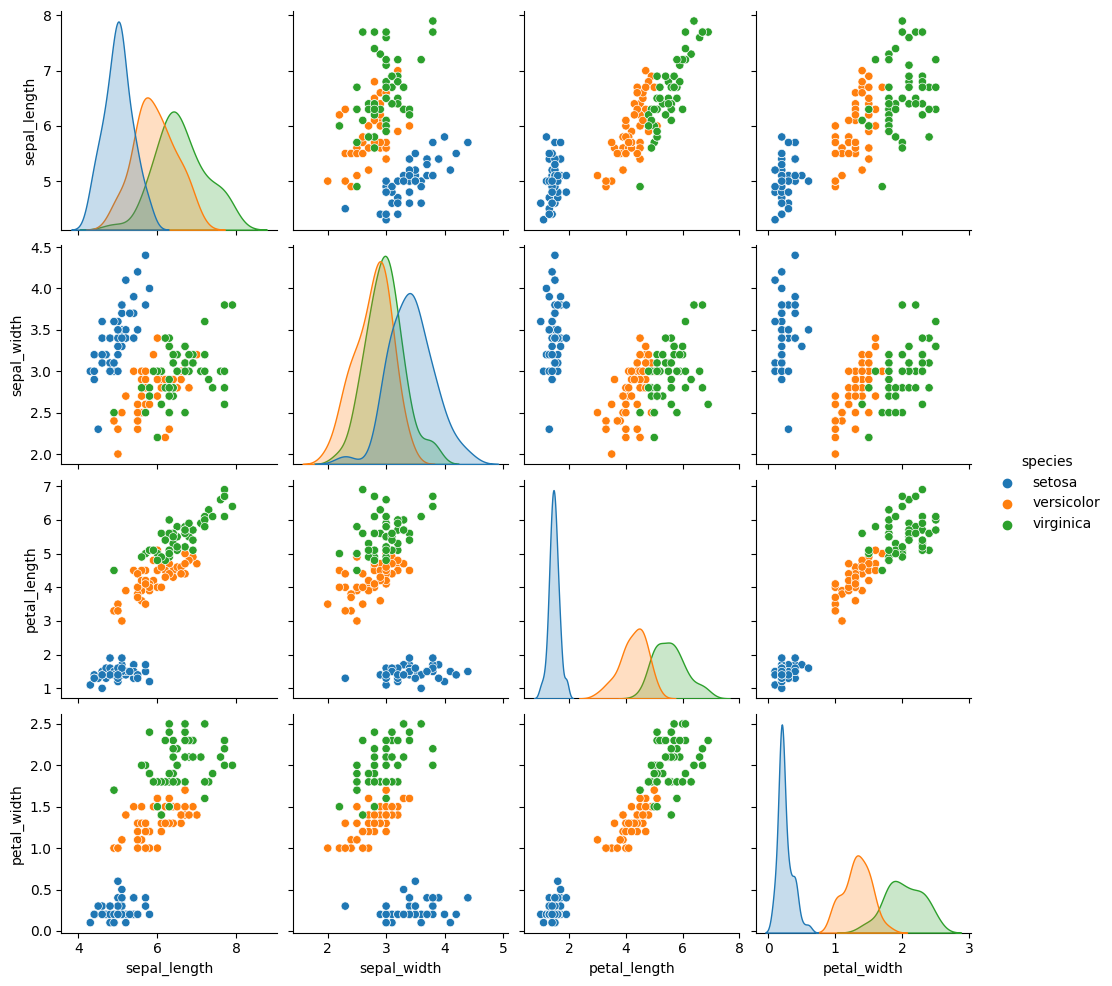

In [5]:
sns.pairplot(df, hue='species')

## **2. Plots that give Linearly Separable Classes**

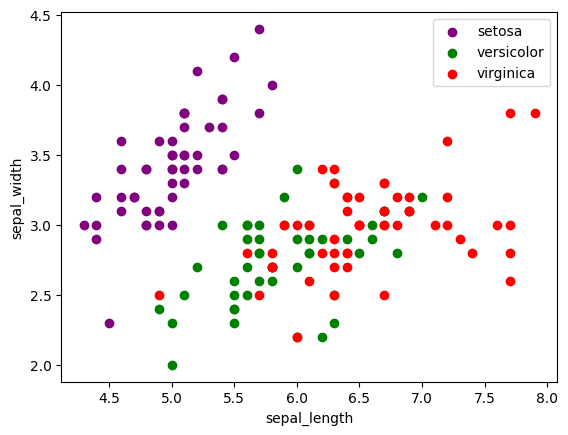

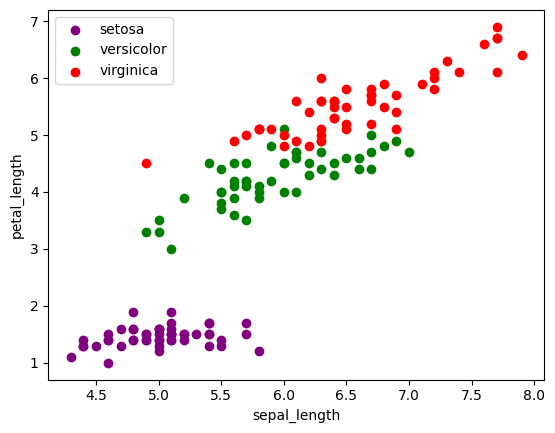

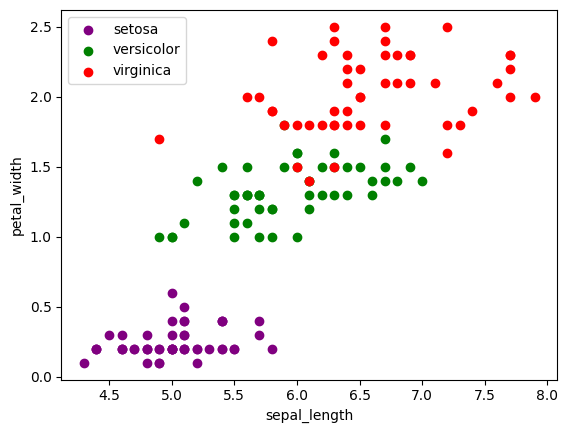

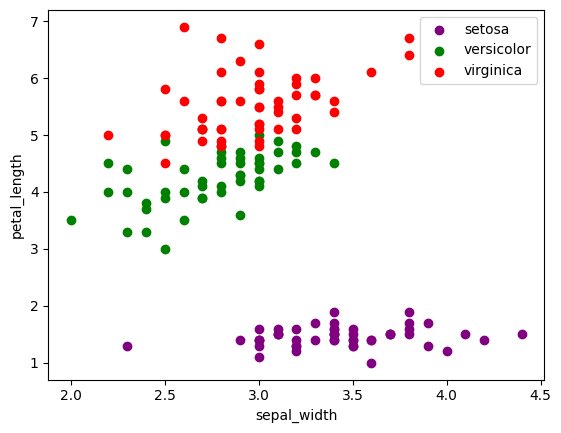

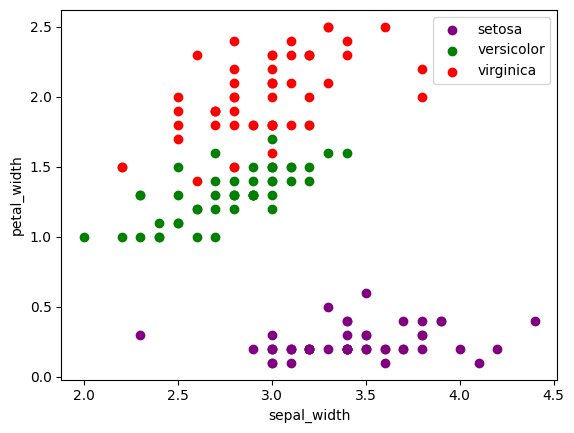

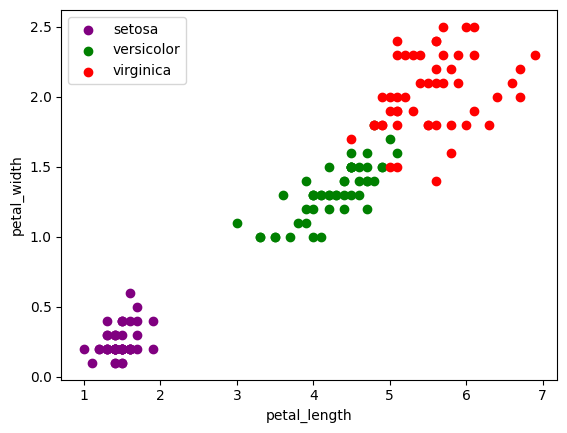

In [ ]:
num_features=4
for i in range(num_features):
    for j in range(i+1, num_features):
        plt.figure()
        for label, color in colors.items():
            plt.scatter(df[df['species']==label].iloc[:,i], df[df['species']==label].iloc[:,j], 
                        c=color, label=label)
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.legend()
        plt.show()

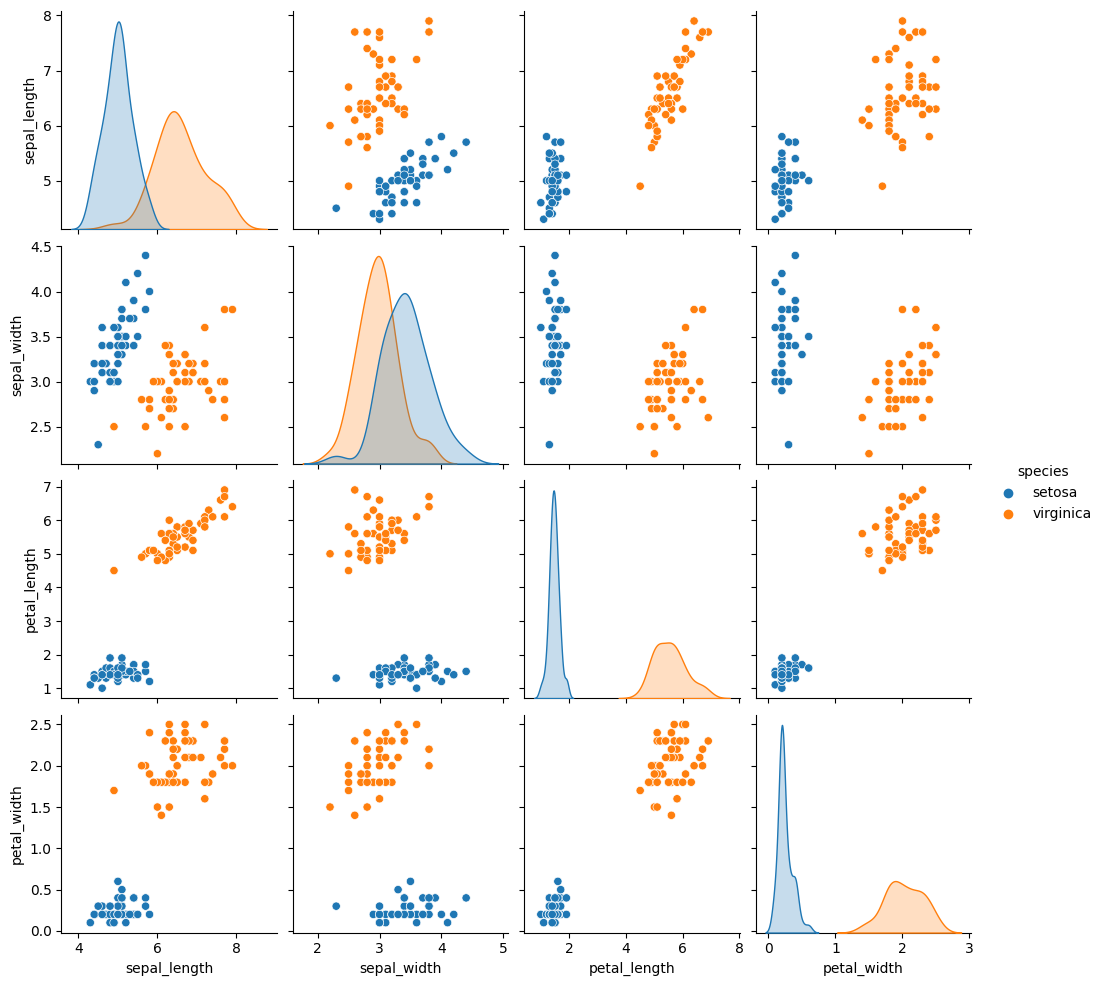

In [6]:
iris = df[(df['species'] == 'setosa') | (df['species'] == 'virginica')]
sns.pairplot(iris, hue='species')

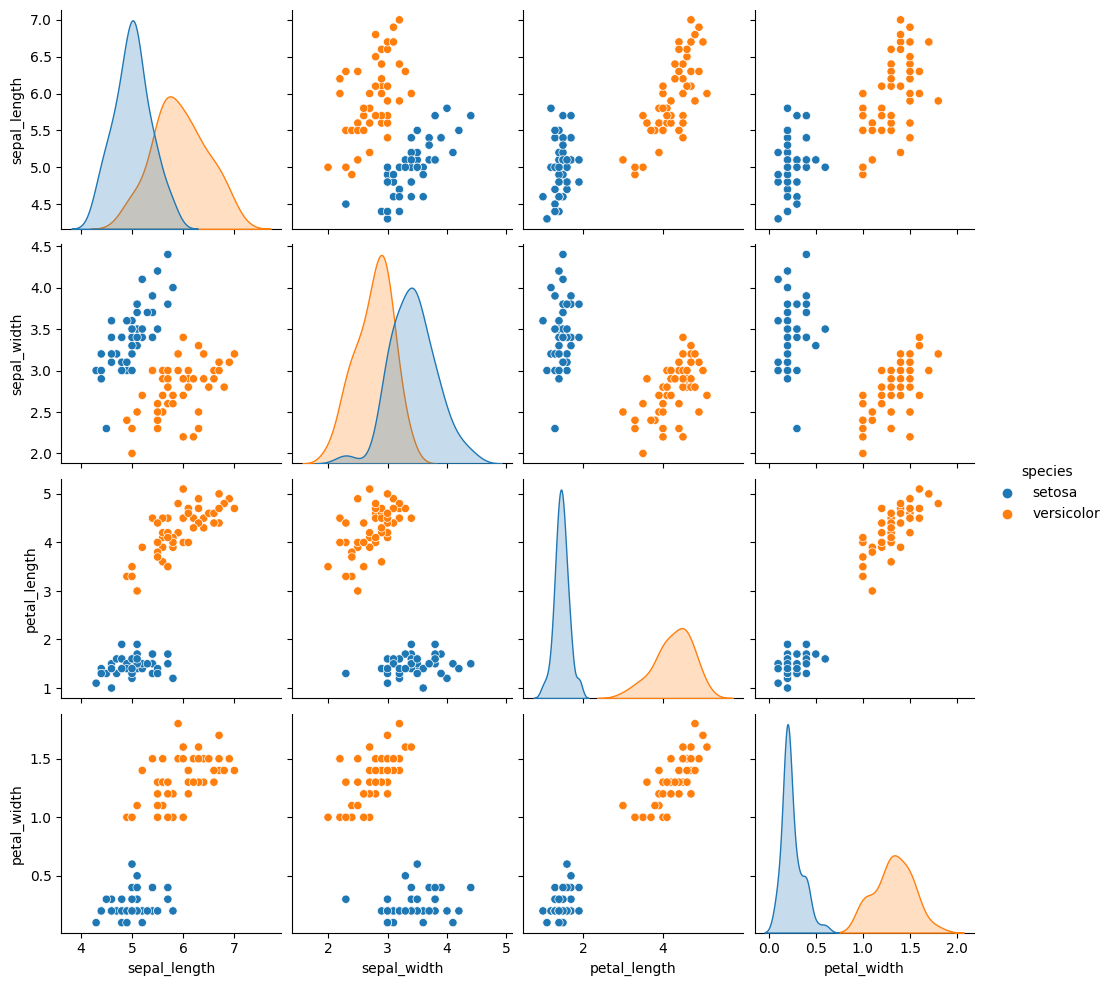

In [8]:
iris = df[(df['species'] == 'setosa') | (df['species'] == 'versicolor')]
sns.pairplot(iris, hue='species')

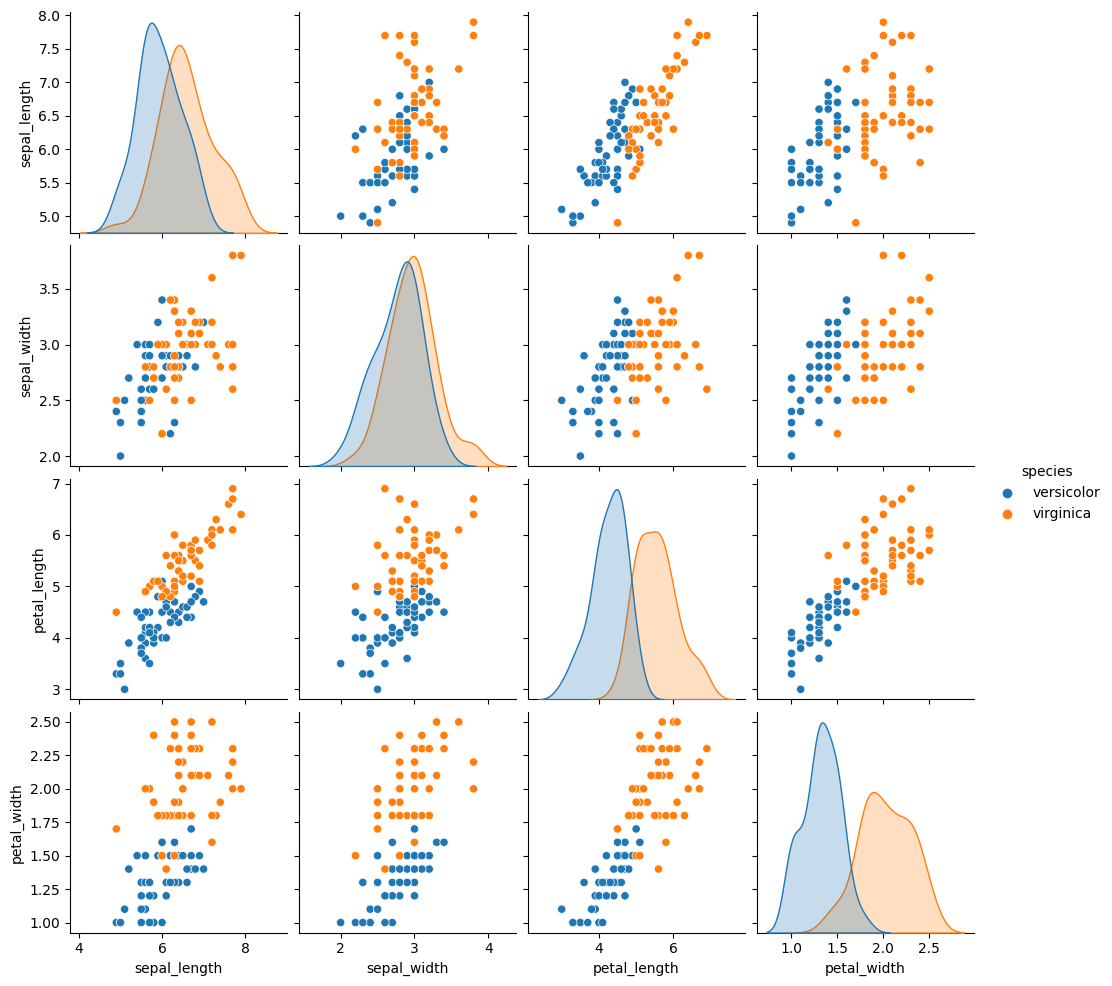

In [9]:
iris = df[(df['species'] == 'virginica') | (df['species'] == 'versicolor')]
sns.pairplot(iris, hue='species')

**Fitting a straight line that separates Setosa**

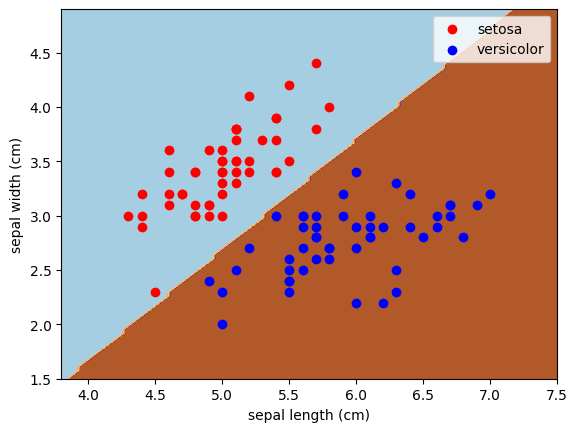

In [ ]:
from sklearn.linear_model import LogisticRegression

X = df.iloc[:100, :2].values  
y = df.iloc[:100, 4].values   
y = np.where(y == 'setosa', 0, 1)  

clf = LogisticRegression()
clf.fit(X, y)


x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
for label, color in [('setosa', 'red'), ('versicolor', 'blue')]:
    plt.scatter(df[df['species']==label]['sepal_length'], df[df['species']==label]['sepal_width'], 
                c=color, label=label)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

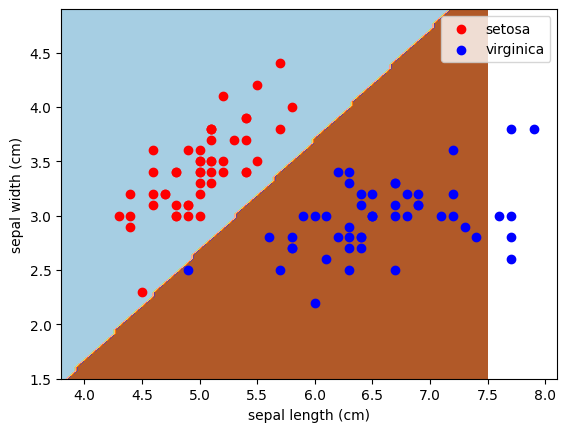

In [7]:
from sklearn.linear_model import LogisticRegression

X = df.iloc[:100, :2].values  
y = df.iloc[:100, 4].values   
y = np.where(y == 'setosa', 0, 1)  

clf = LogisticRegression()
clf.fit(X, y)


x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
for label, color in [('setosa', 'red'), ('virginica', 'blue')]:
    plt.scatter(df[df['species']==label]['sepal_length'], df[df['species']==label]['sepal_width'], 
                c=color, label=label)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

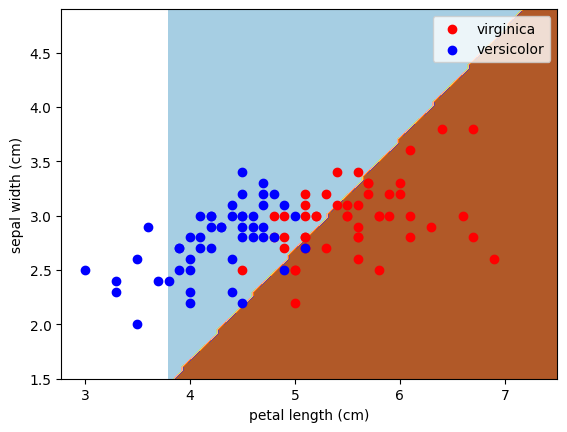

In [11]:
from sklearn.linear_model import LogisticRegression

X = df.iloc[:100, :2].values  
y = df.iloc[:100, 4].values   
y = np.where(y == 'setosa', 0, 1)  

clf = LogisticRegression()
clf.fit(X, y)


x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
for label, color in [('virginica', 'red'), ('versicolor', 'blue')]:
    plt.scatter(df[df['species']==label]['petal_length'], df[df['species']==label]['sepal_width'], 
                c=color, label=label)
plt.xlabel('petal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

Not linearly separable

In [12]:
df= pd.read_csv('adult.data')
df.columns=['Age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
